# Implementing Random Forest Regression ML Algorithm to predict house prices using Boston Housing Dataset

In [2]:
#import necessary libraries
import pandas as pd #to load dataframe
import numpy as np #for calculations on arrays
import matplotlib.pyplot as plt #for visualizations
import seaborn as sns #for high level statistical graphics (builds on top of matplotlib)

from sklearn.model_selection import train_test_split #to split data into training and testing sets
from sklearn.ensemble import RandomForestRegressor #to implement random forest regressor
from sklearn.metrics import mean_squared_error, r2_score #to evaluate model performance
from sklearn.preprocessing import StandardScaler #to standardize features of dataset (scale them to have 0 mean and unit variance)

In [3]:
#load dataset
df=pd.read_csv('BostonHousingData.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


Explanation of fields in dataset:
---
* CRIM : Crime rate per capita

* ZN : Proportion of residential land zoned for large lots

* INDUS : Proportion of non-retail business acres

* CHAS : Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

* NOX : Nitric oxide concentration (parts per 10 million)

* RM : Average number of rooms per dwelling

* AGE : Proportion of owner-occupied units built before 1940

* DIS : Weighted distances to five Boston employment centers

* RAD : Index of accessibility to radial highways

* TAX : Full-value property-tax rate per $10,000

* PTRATIO : Pupil-teacher ratio by town

* B : 1000(Bk - 0.63)^2, where Bk is the proportion of Black residents

* LSTAT : % lower status of the population

* MEDV : (Target) Median value of owner-occupied homes in $1000s




In [5]:
#check for missing values in dataset
df.isnull().sum()

,0
CRIM,20
ZN,20
INDUS,20
CHAS,20
NOX,0
RM,0
AGE,20
DIS,0
RAD,0
TAX,0


In [7]:
#we must decide how to handle missing values
#if we drop rows with missing data, for a small dataset like this, it can lead to loss of valuable data and decrease accuracy of model
#so, we will follow imputation- handle missing values by replacing them with mean of that column
df.fillna(df.mean(), inplace=True)
df.isnull().sum() # to check if there are any missing values left still

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


In [8]:
#separate features and target variables
X=df.drop('MEDV', axis=1) #features #axis=1 means column is dropped (axis=0 indicates row)
y=df['MEDV'] #target variable

In [9]:
#train-test-split (80% training and 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
#normalize features for better performance
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [12]:
#initialize random forest regressor
rf=RandomForestRegressor(n_estimators=100, random_state=42) #100 decision trees and random state=42 for reprducibility (random_state is seed value for random number generator)

In [13]:
#train the model
rf.fit(X_train, y_train)

#make predictions
y_pred=rf.predict(X_test)

In [14]:
#evaluate the model
mse=mean_squared_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Squared Error: 8.260524343137256
R-squared: 0.8873571771815177


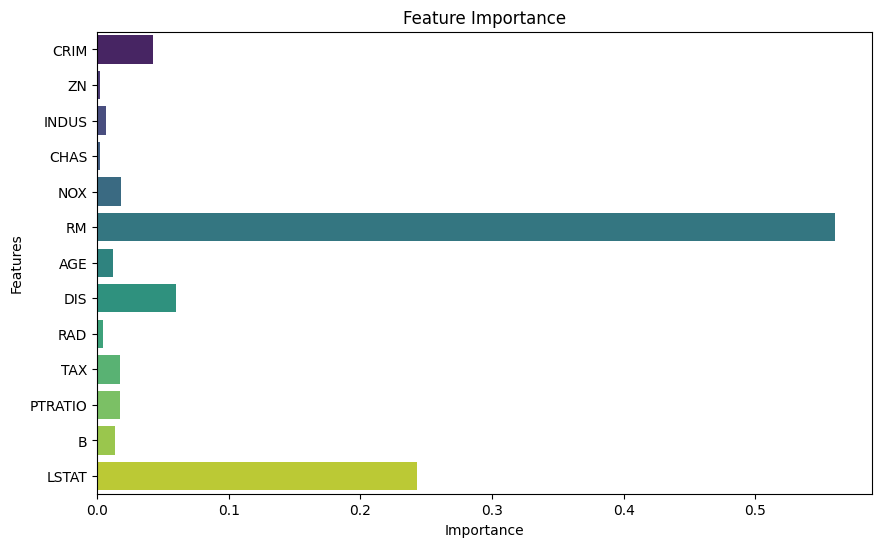

In [18]:
#feature importance plot
plt.figure(figsize=(10, 6))
features=X.columns
importances=rf.feature_importances_
#sns.barplot(x=importances, y=features, palette="viridis")
sns.barplot(x=importances, y=features, hue=features, dodge=False, palette="viridis", legend=False)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

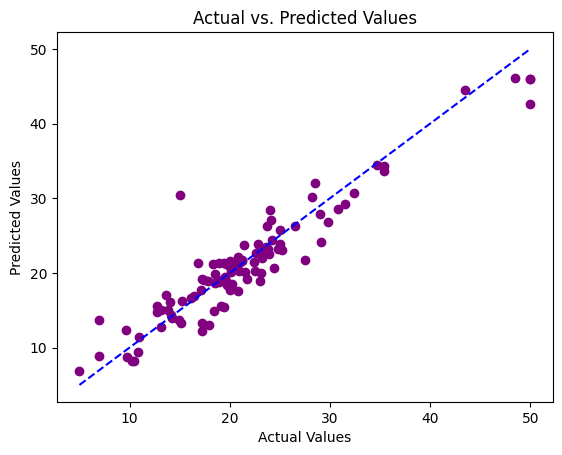

In [20]:
#plotting actual v/s predicted values
plt.scatter(y_test, y_pred, color="purple")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='blue', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()